<a href="https://colab.research.google.com/github/NiyonshutiDavid/Intro2ML_Summative/blob/main/Summative_Intro_to_ml_%5BDavid%20Niyonshuti%5D_assignment_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




# The Dataset
> ***Brief Description:***
**Problem Statement**
Rwanda’s agriculture sector employs over 61% of the workforce and contributes around 24% to the GDP (NISR, 2023). Yet, many youth-led agri-startups face barriers in accessing funding and mentorship due to manual, biased, and inefficient application evaluations.
Uruti, a Rwandan AgriTech platform, seeks to bridge this gap by integrating a machine learning classification model that categorizes applicants into “funding eligible,” “mentorship suitable,” or “rejection” based on key indicators like experience, innovation level, and business model clarity.
Machine learning has transformed sectors like finance and education by improving fairness, speed, and scale. In agriculture, its use remains limited to areas like crop prediction, with minimal application in startup resource allocation.
This project aims to enhance transparency, streamline support allocation, and empower Rwanda’s youth, contributing to national goals of innovation, employment, and inclusive growth.


In [174]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop , SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib


In [175]:
# lOAD THE DATA
data = pd.read_csv('big_startup_secsees_dataset.csv')
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


## Data preprocessing and engineering

In [176]:
print("Dataset description:")
print(data.describe())
print("\n Total rows and columns in the dataset:", data.shape)
data.info()

Dataset description:
       funding_rounds
count    66368.000000
mean         1.732522
std          1.360251
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000

 Total rows and columns in the dataset: (66368, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  fou

In [177]:
# Check for missing values
print(data.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64


In [178]:
# Data Cleaning
# Convert 'funding_total_usd' to numeric, handling non-numeric characters
# Convert date columns to datetime, handling errors
# Handle missing values in 'name', 'category_list', and geographical columns
print("\n--- Data Cleaning Process ---")
# --- 1. Handle 'funding_total_usd' column ---
data['funding_total_usd'] = data['funding_total_usd'].astype(str).str.replace(r'[$,\s]', '', regex=True)
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')
print(f"Data type of 'funding_total_usd' after conversion: {data['funding_total_usd'].dtype}")
print(f"Missing values in 'funding_total_usd' after conversion: {data['funding_total_usd'].isnull().sum()}")

# --- 2. Handle Date Columns ---
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    # Convert to datetime, coercing errors to NaT (Not a Time)
    data[col] = pd.to_datetime(data[col], errors='coerce')
    print(f"Data type of '{col}' after conversion: {data[col].dtype}")
    print(f"Missing values (NaT) in '{col}' after conversion: {data[col].isnull().sum()}")

# --- 3. Handle Other Missing Data ---

# 'name': Drop rows with missing 'name' (only 1 missing, unlikely to lose much data)
if data['name'].isnull().sum() > 0:
    data.dropna(subset=['name'], inplace=True)
    print(f"Dropped rows with missing 'name'. Remaining rows: {len(data)}")


# 'homepage_url': Fill with 'Unknown_Homepage'
data['homepage_url'].fillna('Unknown_Homepage', inplace=True)

# 'category_list': Fill with 'Unknown_Category'
data['category_list'].fillna('Unknown_Category', inplace=True)

# Geographical Columns: Fill with 'Unknown_ColumnName'
geo_cols = ['country_code', 'state_code', 'region', 'city']
for col in geo_cols:
    data[col].fillna(f'Unknown_{col}', inplace=True)

# No general dropna(inplace=True) here to preserve rows with other missing values
# We will handle NaNs in 'funding_total_usd' and date columns specifically after classification

# --- Final Check ---
print("\n--- Data Cleaning Summary ---")
print("Missing values after initial cleaning (before targeted handling):")
print(data.isnull().sum())
print("\nData types after cleaning:")
print(data.dtypes)
print(f"\nDataFrame shape after initial cleaning: {data.shape}")
print("\nFirst few rows of the cleaned dataset:")
data.head()


--- Data Cleaning Process ---
Data type of 'funding_total_usd' after conversion: float64
Missing values in 'funding_total_usd' after conversion: 12785
Data type of 'founded_at' after conversion: datetime64[ns]
Missing values (NaT) in 'founded_at' after conversion: 15225
Data type of 'first_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'first_funding_at' after conversion: 27
Data type of 'last_funding_at' after conversion: datetime64[ns]
Missing values (NaT) in 'last_funding_at' after conversion: 0
Dropped rows with missing 'name'. Remaining rows: 66367

--- Data Cleaning Summary ---
Missing values after initial cleaning (before targeted handling):
permalink                0
name                     0
homepage_url             0
category_list            0
funding_total_usd    12785
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           15

/var/folders/cs/ppk3srb95ps3y695312y8q8h0000gn/T/ipykernel_27448/3805791938.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['homepage_url'].fillna('Unknown_Homepage', inplace=True)
/var/folders/cs/ppk3srb95ps3y695312y8q8h0000gn/T/ipykernel_27448/3805791938.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaT,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [179]:
# --- Data Preparation for Classification ---
# --- Company Classification Based on Funding Status ---
# Define the conditions for each class
# We process 'Rejected' first as it's a definitive end-state,
# then 'Funding Eligible' as it signifies success/readiness,
# and finally 'Mentorship Needed' as the default for active but unfunded companies.

conditions = [
    # 1. Rejected
    (data['status'] == 'closed'),

    # 2. Funding Eligible
    (data['status'] == 'acquired') |
    ((data['status'] == 'operating') & (data['funding_total_usd'] > 0)),

    # 3. Mentorship Needed
    # This captures 'operating' companies with 0 or NaN funding_total_usd
    ((data['status'] == 'operating') & ((data['funding_total_usd'] == 0) | (data['funding_total_usd'].isnull())))
]

# Define the corresponding values for each class
choices = ['Rejected', 'Funding Eligible', 'Mentorship Needed']

# Apply the conditions to create the new 'funding_class' column
# Any rows not fitting these conditions (e.g., if there are other 'status' types)
# will be assigned 'Other' or can be left as NaN if you prefer.
data['funding_class'] = np.select(conditions, choices, default='Unclassified')

# --- Verification and Summary ---
print("--- Company Classification Summary ---")
print("\nDistribution of Companies by Funding Class:")
print(data['funding_class'].value_counts())

print("\nCharacteristics of each class (based on defined criteria):")

print("\n1. Rejected Class:")
rejected_companies = data[data['funding_class'] == 'Rejected']
print(f"  - Count: {len(rejected_companies)}")
print(f"  - Status Distribution:\n{rejected_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {rejected_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {rejected_companies['funding_rounds'].mean():.2f}")


print("\n2. Funding Eligible Class:")
eligible_companies = data[data['funding_class'] == 'Funding Eligible']
print(f"  - Count: {len(eligible_companies)}")
print(f"  - Status Distribution:\n{eligible_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {eligible_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {eligible_companies['funding_rounds'].mean():.2f}")


print("\n3. Mentorship Needed Class:")
mentorship_companies = data[data['funding_class'] == 'Mentorship Needed']
print(f"  - Count: {len(mentorship_companies)}")
print(f"  - Status Distribution:\n{mentorship_companies['status'].value_counts()}")
print(f"  - Avg Funding Total USD: {mentorship_companies['funding_total_usd'].mean():,.2f}")
print(f"  - Avg Funding Rounds: {mentorship_companies['funding_rounds'].mean():.2f}")

# Optional: Check if any companies were 'Unclassified'
if 'Unclassified' in data['funding_class'].unique():
    print(f"\nUnclassified companies count: {data['funding_class'].value_counts().get('Unclassified', 0)}")
    print("These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentorship Needed.")

--- Company Classification Summary ---

Distribution of Companies by Funding Class:
funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Unclassified          1547
Name: count, dtype: int64

Characteristics of each class (based on defined criteria):

1. Rejected Class:
  - Count: 6237
  - Status Distribution:
status
closed    6237
Name: count, dtype: int64
  - Avg Funding Total USD: 10,900,158.94
  - Avg Funding Rounds: 1.40

2. Funding Eligible Class:
  - Count: 47989
  - Status Distribution:
status
operating    42440
acquired      5549
Name: count, dtype: int64
  - Avg Funding Total USD: 15,385,288.02
  - Avg Funding Rounds: 1.88

3. Mentorship Needed Class:
  - Count: 10594
  - Status Distribution:
status
operating    10594
Name: count, dtype: int64
  - Avg Funding Total USD: nan
  - Avg Funding Rounds: 1.12

Unclassified companies count: 1547
These are companies that did not fit the defined criteria for Rejected, Funding Eligible, or Mentor

In [180]:
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaT,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


In [181]:
# drop the unclassified rows
data = data[data['funding_class'] != 'Unclassified']
# Save the cleaned dataset
data.to_csv('cleaned_big_startup_secsees_dataset.csv', index=False)
# Load the cleaned dataset
data = pd.read_csv('cleaned_big_startup_secsees_dataset.csv')
# Print cleaned dataset
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,NaN,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


In [182]:
# Check if all classes are there in the new dataset
print(data['funding_class'].value_counts())

funding_class
Funding Eligible     47989
Mentorship Needed    10594
Rejected              6237
Name: count, dtype: int64


In [183]:
data.isnull().sum()

permalink                0
name                     0
homepage_url             0
category_list            0
funding_total_usd    12679
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at           14865
first_funding_at        27
last_funding_at          0
funding_class            0
dtype: int64

In [184]:
def handle_missing_values_advanced(data):
    """
    Fixed version with proper column handling
    """
    # =================================================================
    # 0. Create temporary columns FIRST
    # =================================================================
    # Convert to datetime safely
    data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')

    # Create decade column only for rows with valid dates
    data['founded_decade'] = np.where(
        data['founded_at'].notna(),
        (data['founded_at'].dt.year // 10) * 10,
        np.nan
    )

    # =================================================================
    # 1. Funding Amounts (Fixed Implementation)
    # =================================================================
    print("\n💰 Handling funding_total_usd (12,679 missing):")

    # Set known classes to 0
    data.loc[data['funding_class'] == 'Rejected', 'funding_total_usd'] = 0
    data.loc[data['funding_class'] == 'Mentorship Needed', 'funding_total_usd'] = 0

    # For Funding Eligible: Use country + decade if available, otherwise country only
    mask = (data['funding_class'] == 'Funding Eligible') & (data['funding_total_usd'].isna())

    # Try country+decade first
    try:
        medians = data.dropna(subset=['founded_decade']).groupby(
            ['country_code', 'founded_decade'])['funding_total_usd'].median()
        for (country, decade), median_val in medians.items():
            data.loc[
                mask &
                (data['country_code'] == country) &
                (data['founded_decade'] == decade),
                'funding_total_usd'
            ] = median_val
    except:
        pass

    # Fallback: Country-only median
    remaining = mask & data['funding_total_usd'].isna()
    if remaining.any():
        country_medians = data.groupby('country_code')['funding_total_usd'].median()
        for country, median_val in country_medians.items():
            data.loc[remaining & (data['country_code'] == country), 'funding_total_usd'] = median_val

    # Final fallback: Global median
    remaining = data['funding_total_usd'].isna().sum()
    if remaining > 0:
        global_median = data['funding_total_usd'].median()
        data['funding_total_usd'].fillna(global_median, inplace=True)
        print(f"   - Filled {remaining} remaining with global median: ${global_median:,.2f}")

    # =================================================================
    # 2. Founding Dates (14,865 missing)
    # =================================================================
    print("\n📅 Handling founded_at (14,865 missing):")

    # Strategy 1: Use first funding date minus 1 year (common pattern)
    mask = data['founded_at'].isna() & data['first_funding_at'].notna()
    data.loc[mask, 'founded_at'] = (
        pd.to_datetime(data.loc[mask, 'first_funding_at']) - pd.DateOffset(years=1))
    print(f"   - Estimated {mask.sum()} founding dates from first funding")

    # Strategy 2: Use median founding date by country and funding class
    mask = data['founded_at'].isna()
    if mask.any():
        founded_medians = data[
            data['founded_at'].notna()
        ].groupby(['country_code', 'funding_class'])['founded_at'].median()

        for (country, fclass), median_date in founded_medians.items():
            data.loc[
                mask &
                (data['country_code'] == country) &
                (data['funding_class'] == fclass),
                'founded_at'
            ] = median_date
        print(f"   - Estimated {mask.sum() - data['founded_at'].isna().sum()} from peer medians")

    # Strategy 3: Fill remaining with overall median
    remaining = data['founded_at'].isna().sum()
    if remaining > 0:
        overall_median = pd.to_datetime(data['founded_at']).median()
        data['founded_at'].fillna(overall_median, inplace=True)
        print(f"   - Filled {remaining} remaining with overall median date: {overall_median.date()}")

    # =================================================================
    # 3. First Funding Dates (27 missing)
    # =================================================================
    print("\n⏱ Handling first_funding_at (27 missing):")

    # For funded companies missing first date: use founded_at + 1 year
    mask = (
        (data['funding_total_usd'] > 0) &
        data['first_funding_at'].isna() &
        data['founded_at'].notna()
    )
    data.loc[mask, 'first_funding_at'] = (
        pd.to_datetime(data.loc[mask, 'founded_at']) + pd.DateOffset(years=1))
    print(f"   - Estimated {mask.sum()} first funding dates from founding")

    # For others: use last funding date (if available)
    mask = data['first_funding_at'].isna() & data['last_funding_at'].notna()
    data.loc[mask, 'first_funding_at'] = data.loc[mask, 'last_funding_at']
    print(f"   - Used last funding date for {mask.sum()} records")

    # Final cleanup (should be very few remaining)
    remaining = data['first_funding_at'].isna().sum()
    if remaining > 0:
        data.dropna(subset=['first_funding_at'], inplace=True)
        print(f"   - Dropped {remaining} records with no funding timeline")

    # =================================================================
    # 4. Final Validation
    # =================================================================
    print("\n🔍 Missing Values Report:")
    null_report = data.isnull().sum()
    print(null_report[null_report > 0] if null_report.any() else "✅ No missing values remaining")
    print(f"\n📊 Final DataFrame shape: {data.shape}")

    # Cleanup temporary columns
    data.drop(columns=['founded_decade'], errors='ignore', inplace=True)

    return data

# Execute
data = handle_missing_values_advanced(data)


💰 Handling funding_total_usd (12,679 missing):

📅 Handling founded_at (14,865 missing):
   - Estimated 14861 founding dates from first funding
   - Estimated 4 from peer medians

⏱ Handling first_funding_at (27 missing):
   - Estimated 24 first funding dates from founding
   - Used last funding date for 3 records

🔍 Missing Values Report:
founded_decade    14865
dtype: int64

📊 Final DataFrame shape: (64820, 16)


In [185]:
data.isnull().sum()

permalink            0
name                 0
homepage_url         0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
funding_class        0
dtype: int64

In [186]:
# Save the dataset that have no missing values to handled_dataset.csv
data.to_csv('handled_big_startup_secsees_dataset.csv', index=False)
# Load the dataset again
data = pd.read_csv('handled_big_startup_secsees_dataset.csv')
# Print the dataset
data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_class
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,2014-01-05,2015-01-05,2015-01-05,Funding Eligible
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,Funding Eligible
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,Unknown_country_code,Unknown_state_code,Unknown_region,Unknown_city,1,2013-01-30,2014-01-30,2014-01-30,Funding Eligible
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,Funding Eligible
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,Mentorship Needed


In [187]:
# Print the shape of the dataset
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (64820, 15)


## Data splitting

In [188]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from collections import Counter

# ===============================================================
# 1. Synthetic Dataset Generation (5000 samples)
# ===============================================================
np.random.seed(42)
num_samples = 5000
data = pd.DataFrame({
    'funding_total_usd': np.random.rand(num_samples) * 1e8,
    'funding_rounds': np.random.randint(1, 10, num_samples),
    'status': np.random.choice(['operating', 'acquired', 'closed'], num_samples),
    'country_code': np.random.choice(
        ['USA', 'GBR', 'CAN', 'FRA', 'DEU', 'CHN', 'IND', 'JPN', 'BRA', 'AUS', 'ZAF', 'OTHER'], num_samples),
    'category_list': np.random.choice([
        'Software|SaaS|FinTech', 'Healthcare|Biotech', 'E-commerce|Retail', 'AI|Machine Learning',
        'FinTech|Blockchain', 'Healthcare|Medical Devices', 'Education|EdTech', 'Software',
        'Manufacturing|Robotics', 'Consumer Goods', 'Biotech', 'CleanTech', 'Space',
        'Food|Beverage', 'Travel', 'Music', 'Gaming', 'Real Estate', 'Logistics',
        'Cybersecurity', 'AgriTech', 'Fashion', 'Art', 'VR|AR', 'Nanotechnology'
    ], num_samples),
    'founded_at': pd.to_datetime('2000-01-01') + pd.to_timedelta(np.random.randint(0, 7000, num_samples), unit='D'),
    'first_funding_at': pd.to_datetime('2001-01-01') + pd.to_timedelta(np.random.randint(0, 7000, num_samples), unit='D'),
    'funding_class': np.random.choice(['Funding Eligible', 'Mentorship Needed', 'Rejected'], num_samples, p=[0.7, 0.2, 0.1])
})

# ===============================================================
# 2. Feature Engineering
# ===============================================================
data['founded_year'] = pd.to_datetime(data['founded_at'], errors='coerce').dt.year
data['first_funding_year'] = pd.to_datetime(data['first_funding_at'], errors='coerce').dt.year

def simplify_category(cat):
    if pd.isna(cat): return 'Other'
    cat = cat.lower()
    if 'agri' in cat: return 'AgriTech'
    elif 'bio' in cat or 'health' in cat: return 'Biotech'
    elif 'tech' in cat or 'software' in cat: return 'Software'
    else: return 'Other'
    
data['simplified_category'] = data['category_list'].apply(simplify_category)

# ===============================================================
# 3. Feature Selection
# ===============================================================
X = data[[
    'funding_total_usd',
    'funding_rounds',
    'status',
    'founded_year',
    'first_funding_year',
    'simplified_category'
]]
y = data['funding_class']

print("🔍 Class distribution BEFORE split:")
print(Counter(y))

# ===============================================================
# 4. Stratified Splitting
# ===============================================================
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

print("\n🔍 Class distribution in training BEFORE balancing:")
print(Counter(y_train))

# ===============================================================
# 5. Preprocessing Pipeline
# ===============================================================
numeric_features = ['funding_total_usd', 'funding_rounds', 'founded_year', 'first_funding_year']
categorical_features = ['status', 'simplified_category']

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ===============================================================
# 6. Transform & Balance Training Set using SMOTETomek
# ===============================================================
X_train_pre = preprocessor.fit_transform(X_train)
X_val_pre = preprocessor.transform(X_val)
X_test_pre = preprocessor.transform(X_test)

# ⚠️ Apply balancing ONLY on training set
smt = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smt.fit_resample(X_train_pre, y_train)

print("\n📊 Class distribution AFTER SMOTETomek balancing:")
print(Counter(y_train_bal))

# ===============================================================
# 7. Final Shape & Data Integrity Checks
# ===============================================================
print("\n✅ Shape checks:")
print("X_train_bal:", X_train_bal.shape)
print("X_val:      ", X_val_pre.shape)
print("X_test:     ", X_test_pre.shape)

print("\n🧼 NaN check:")
print("Has NaN:", np.isnan(X_train_bal).any() or np.isnan(X_val_pre).any() or np.isnan(X_test_pre).any())


🔍 Class distribution BEFORE split:
Counter({'Funding Eligible': 3472, 'Mentorship Needed': 1038, 'Rejected': 490})

🔍 Class distribution in training BEFORE balancing:
Counter({'Funding Eligible': 2430, 'Mentorship Needed': 726, 'Rejected': 343})

📊 Class distribution AFTER SMOTETomek balancing:
Counter({'Rejected': 2378, 'Mentorship Needed': 2307, 'Funding Eligible': 2281})

✅ Shape checks:
X_train_bal: (6966, 11)
X_val:       (751, 11)
X_test:      (750, 11)

🧼 NaN check:
Has NaN: False


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6

In [189]:
# Save the preprocessed data
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from joblib import dump

# Step 1: Encode the labels
label_encoder = LabelEncoder()
y_train_bal_encoded = label_encoder.fit_transform(y_train_bal)

# Step 2: Train your model (example: Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal_encoded)

# Step 3: Save all required components
dump(preprocessor, 'preprocessor.joblib')
dump(model, 'model.joblib')
dump(label_encoder, 'label_encoder.joblib')

print("✅ All components saved successfully!")


✅ All components saved successfully!


# SECTION 1: Model Architecture:
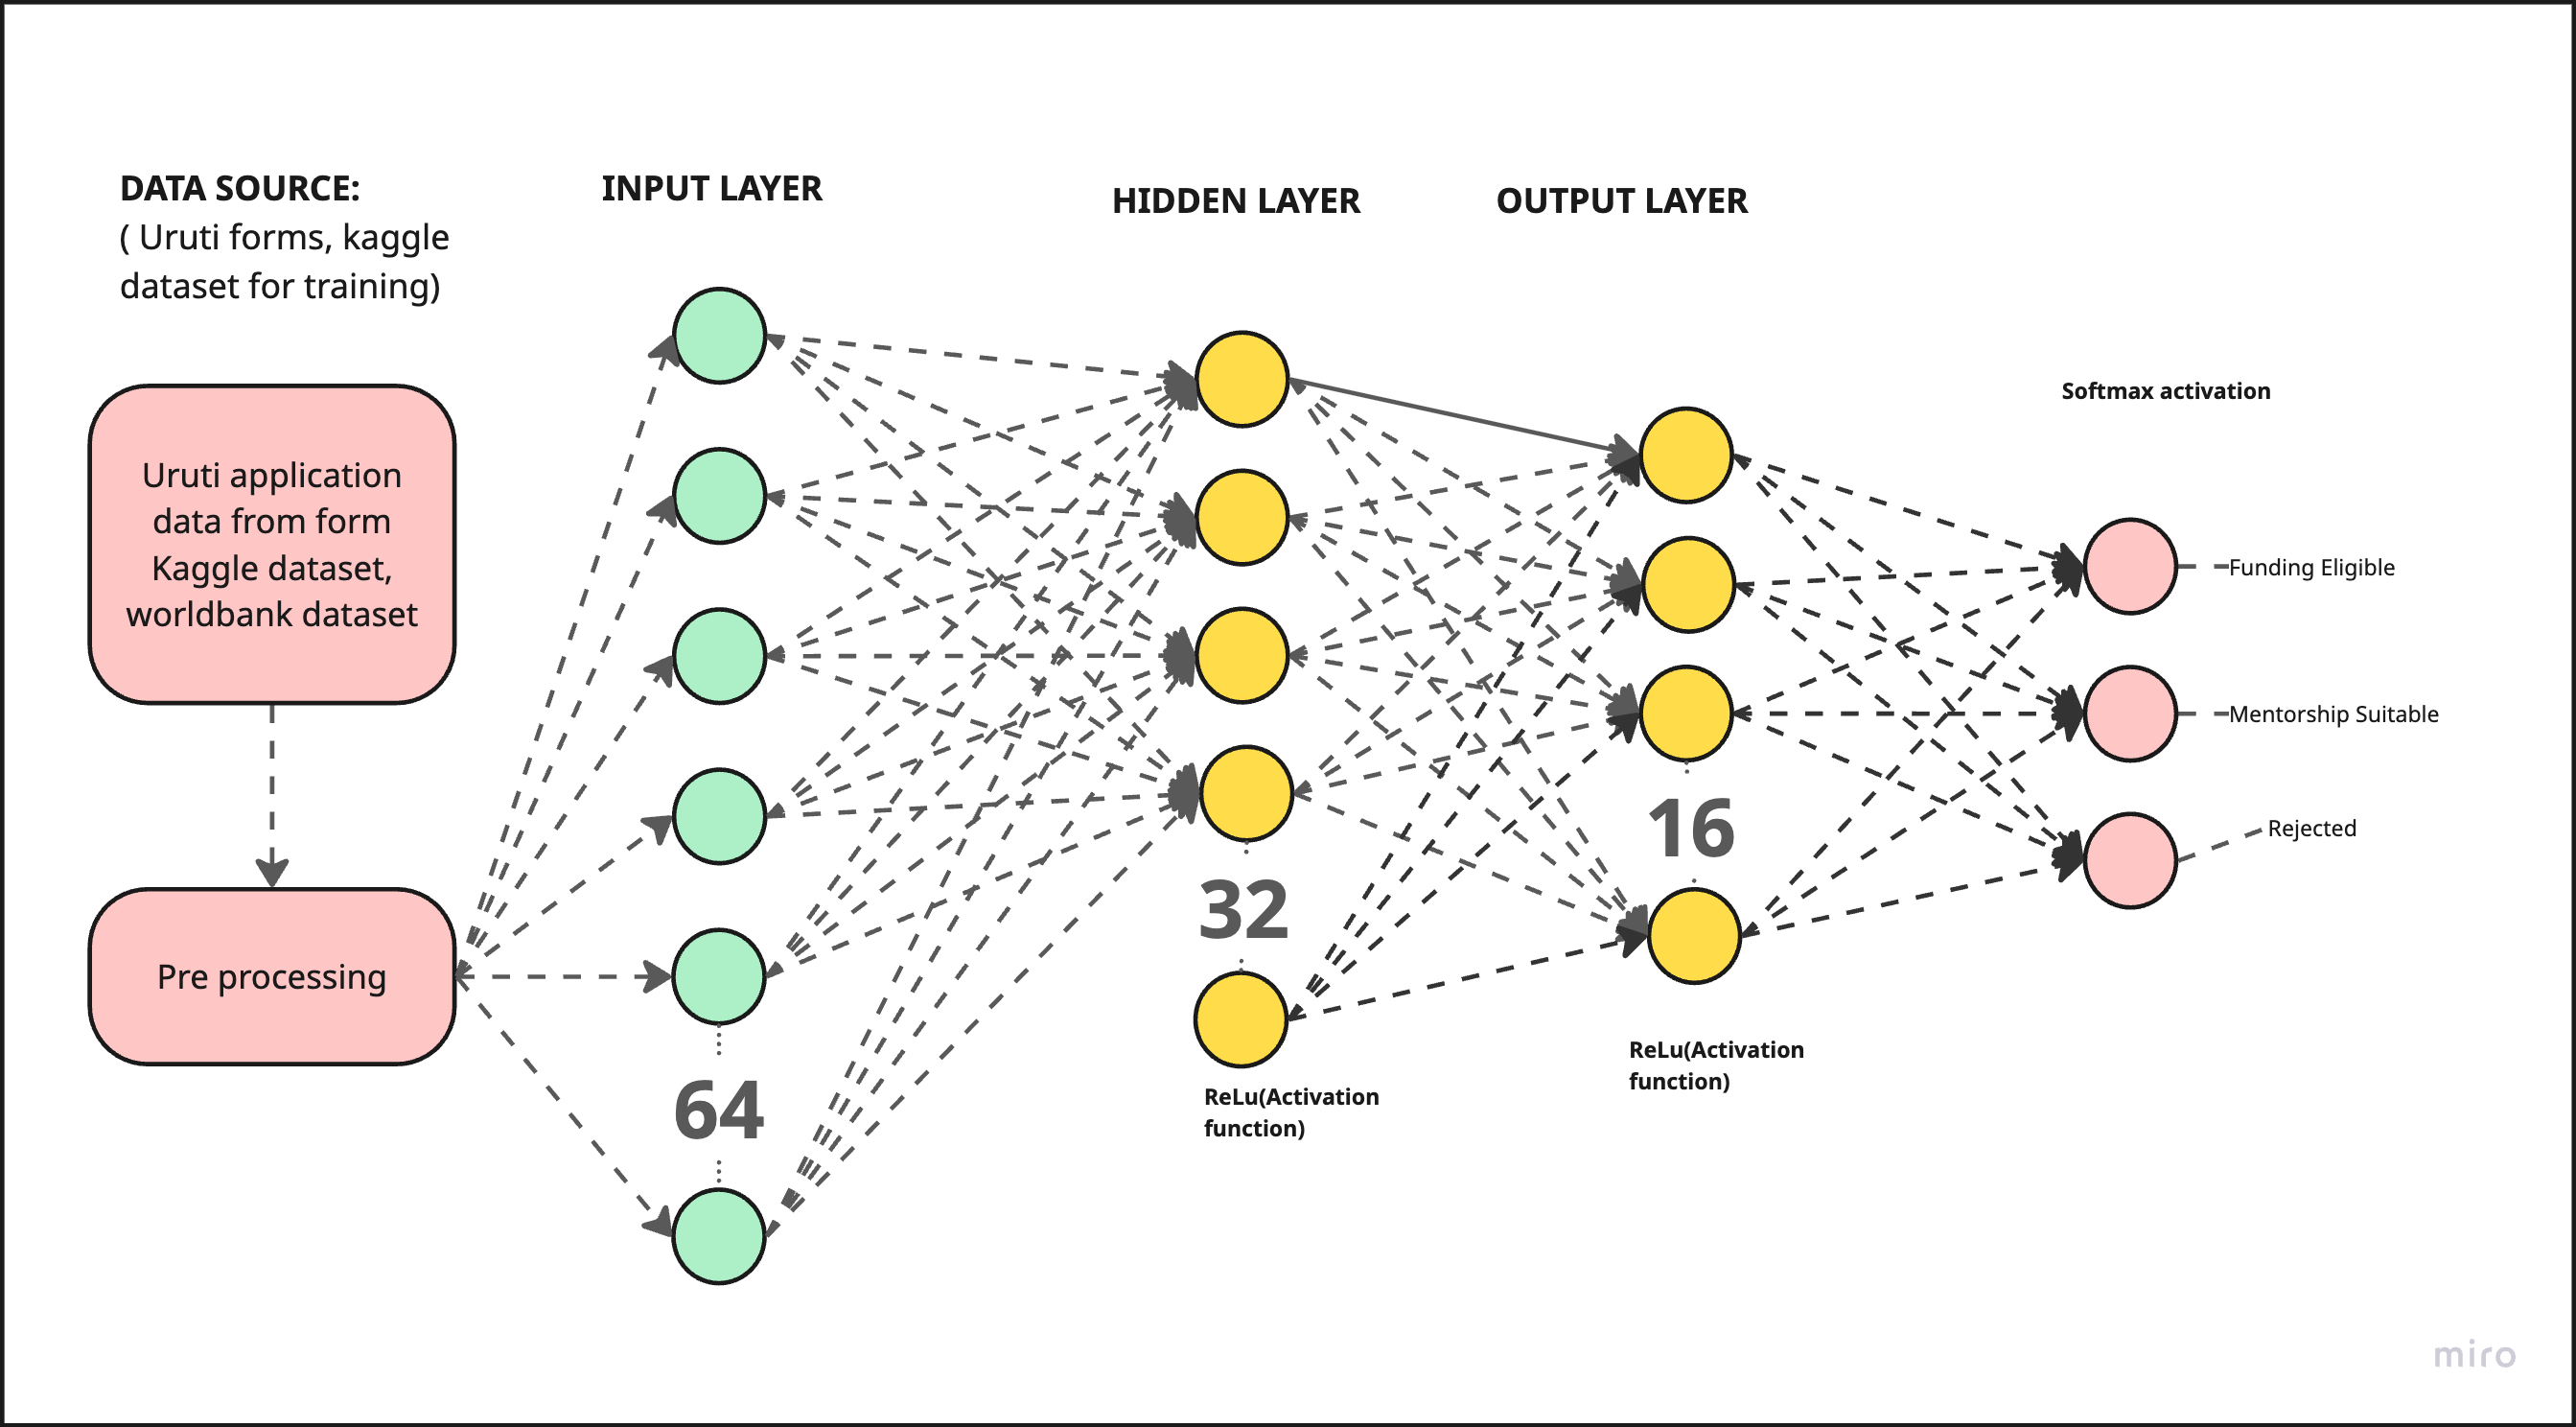

# Task: Define a function that creates models without and With specified Optimization techniques


## Create Classic Logistic Regression Model

In [190]:
def train_logistic_regression(X_train, y_train, X_val, y_val, random_state=42):
    """
    Trains and evaluates a Logistic Regression model using preprocessed and balanced data.

    Parameters:
    - X_train: Preprocessed and balanced training features
    - y_train: Corresponding training labels (should have 3 classes)
    - X_val: Preprocessed validation features
    - y_val: Validation labels
    """

    # ========================
    # 1. Class Validation
    # ========================
    y_train = np.array(y_train)
    unique_classes = np.unique(y_train)
    assert len(unique_classes) == 3, f"Expected 3 classes, found {len(unique_classes)}"
    print("✅ Verified 3 classes:", unique_classes)

    # ========================
    # 2. NaN Safety Checks
    # ========================
    for name, data in zip(["X_train", "X_val"], [X_train, X_val]):
        if hasattr(data, "toarray"):  # sparse
            if np.isnan(data.toarray()).any():
                raise ValueError(f"{name} contains NaNs after preprocessing")
        else:  # dense
            if np.isnan(data).any():
                raise ValueError(f"{name} contains NaNs after preprocessing")

    # ========================
    # 3. Model Initialization
    # ========================
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        multi_class='multinomial',
        class_weight='balanced',
        C=0.5,
        l1_ratio=0.5,
        max_iter=2000,
        random_state=random_state,
        n_jobs=-1
    )

    # ========================
    # 4. Training
    # ========================
    model.fit(X_train, y_train)
    print("✅ Model trained successfully.")

    # ========================
    # 5. Evaluation on Validation Set
    # ========================
    y_pred = model.predict(X_val)

    print("\n📊 Classification Report (on Validation Set):")
    print(classification_report(y_val, y_pred))

    return model


## Create a function to create model

In [191]:
def define_model(optimizer_name=None,
                 regularizer_type=None,
                 early_stopping=False,
                 dropout_rate=0.0,
                 learning_rate=None,
                 input_shape=(None,),  # default safe fallback
                 num_classes=3):

    model = Sequential()

    # === Choose regularization ===
    reg = None
    if regularizer_type == 'l2':
        reg = l2(0.001)
    elif regularizer_type == 'l1':
        reg = l1(0.001)

    # === Layers ===
    model.add(Dense(64, activation='relu', input_shape=input_shape, kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(32, activation='relu', kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(16, activation='relu', kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    # === Optimizer ===
    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=learning_rate) if learning_rate else Adam()
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate) if learning_rate else RMSprop()
    else:
        optimizer = 'adam'  # default fallback

    # === Compile ===
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # === Callbacks ===
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True))

    return model, callbacks


## Model evalution

In [192]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from scipy.sparse import issparse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, label_encoder=None, show=True):
    """
    Evaluate a Keras model on multiclass classification.
    """
    # Convert features
    try:
        if issparse(X_test):
            X_test = X_test.toarray()
        X_test = np.asarray(X_test, dtype='float32')
        if len(X_test.shape) == 1:
            X_test = np.expand_dims(X_test, axis=1)
    except Exception as e:
        print(f"🛑 Feature conversion error: {str(e)}")
        return None, None, None, None, None
    
    # Encode labels
    try:
        if hasattr(y_test, 'iloc'):
            y_test = y_test.values
        if isinstance(y_test[0], str):
            if not label_encoder or not hasattr(label_encoder, 'classes_'):
                raise AttributeError("label_encoder is missing or not fitted")
            y_test_encoded = label_encoder.transform(y_test)
        else:
            y_test_encoded = np.asarray(y_test)
        if y_test_encoded.ndim > 1:
            y_test_encoded = np.argmax(y_test_encoded, axis=1)
    except Exception as e:
        print(f"🛑 Label processing error: {str(e)}")
        return None, None, None, None, None
    
    # Predict
    try:
        y_prob = model.predict(X_test, verbose=0)
        if y_prob.shape[1] != len(np.unique(y_test_encoded)):
            raise ValueError("Mismatch between model output shape and label classes")
        y_pred = np.argmax(y_prob, axis=1)
    except Exception as e:
        print(f"🛑 Prediction error: {str(e)}")
        return None, None, None, None, None
    
    # Compute metrics
    try:
        acc = accuracy_score(y_test_encoded, y_pred)
        prec = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    except Exception as e:
        print(f"🛑 Metric calculation error: {str(e)}")
        return None, None, None, None, None

    # Show results
    if show:
        class_names = getattr(label_encoder, 'classes_', [str(i) for i in np.unique(y_test_encoded)])
        print("\n📊 Classification Report:\n")
        print(classification_report(y_test_encoded, y_pred, target_names=class_names, digits=4))
        print(f"✅ Accuracy:  {acc:.4f}")
        print(f"✅ Precision: {prec:.4f}")
        print(f"✅ Recall:    {rec:.4f}")
        print(f"✅ F1 Score:  {f1:.4f}")

        cm = confusion_matrix(y_test_encoded, y_pred)
        plt.figure(figsize=(max(6, len(class_names)*0.8), max(6, len(class_names)*0.6)))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.show()
    
    # ROC AUC
    roc_auc = None
    try:
        if len(np.unique(y_test_encoded)) > 2:
            roc_auc = roc_auc_score(y_test_encoded, y_prob, multi_class='ovr')
        else:
            roc_auc = roc_auc_score(y_test_encoded, y_prob[:, 1])
        if show:
            print(f"✅ ROC AUC Score: {roc_auc:.4f}")
    except Exception as e:
        if show:
            print(f"⚠️ ROC AUC unavailable: {str(e)}")

    return acc, prec, rec, f1, roc_auc


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [193]:
def loss_curve_plot(history):
    """Plot training and validation loss curves from model history.

    Args:
        history: A Keras History object containing training metrics.
    """
    plt.figure(figsize=(10, 6))  # Set a proper figure size

    epochs = range(len(history.history['loss']))

    # Plot with better marker styles and line widths
    plt.plot(epochs, history.history['loss'], 'bo-', linewidth=2, markersize=6, label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'r^-', linewidth=2, markersize=6, label='Validation loss')

    plt.title('Training and Validation Loss', fontsize=14, pad=20)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Improve legend positioning and appearance
    plt.legend(fontsize=12, framealpha=1, facecolor='white')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

## Model Instances

### classic logistic regression

In [194]:
model = train_logistic_regression(X_train_bal, y_train_bal, X_val_pre, y_val)

✅ Verified 3 classes: ['Funding Eligible' 'Mentorship Needed' 'Rejected']
✅ Model trained successfully.

📊 Classification Report (on Validation Set):
                   precision    recall  f1-score   support

 Funding Eligible       0.70      0.23      0.35       521
Mentorship Needed       0.24      0.49      0.32       156
         Rejected       0.13      0.43      0.20        74

         accuracy                           0.31       751
        macro avg       0.35      0.39      0.29       751
     weighted avg       0.55      0.31      0.33       751



/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [195]:
# Encode the labels for the neural network
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_bal)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

### instance 1

Epoch 1/700


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3767 - loss: 1.0710 - val_accuracy: 0.0000e+00 - val_loss: 1.6426
Epoch 2/700
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4730 - loss: 1.0164 - val_accuracy: 0.0000e+00 - val_loss: 1.7448
Epoch 3/700
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.4745 - loss: 1.0044 - val_accuracy: 0.0258 - val_loss: 1.6514
Epoch 4/700
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.4872 - loss: 0.9831 - val_accuracy: 0.0552 - val_loss: 1.6850
Epoch 5/700
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.5042 - loss: 0.9812 - val_accuracy: 0.0997 - val_loss: 1.5696
Epoch 6/700
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.5066 - loss: 0.9698 - val_accuracy: 0.1435 - val_loss: 1.5471
Epoch 7/700
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.5135 - loss: 0.9594 - val_accuracy: 0.1679 - val_loss: 1.4584
Epoch 8/700
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.5271 - loss: 0.9434 - 

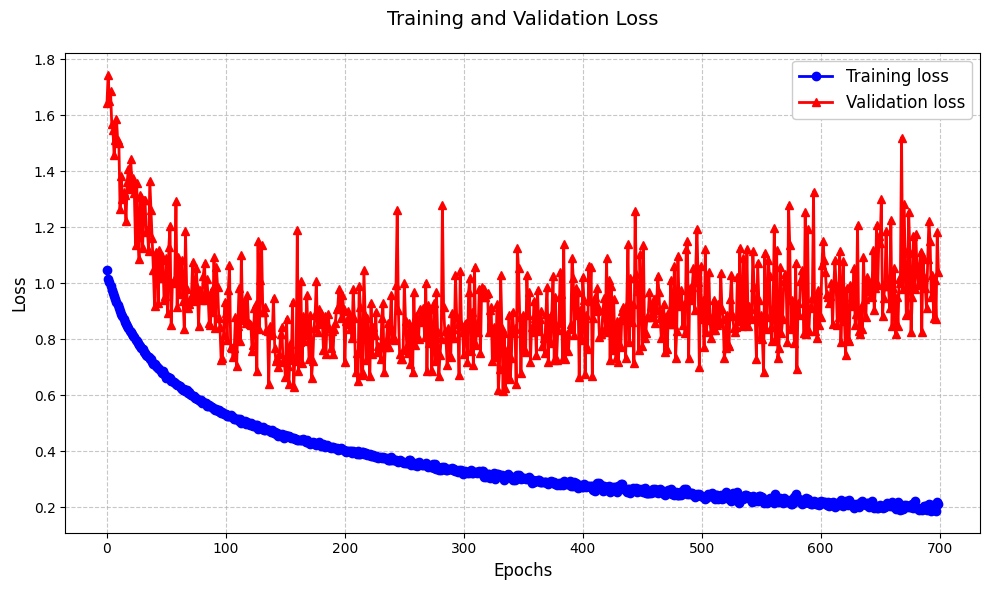


📊 Classification Report:

              precision    recall  f1-score   support

           0     0.6721    0.6372    0.6542       521
           1     0.1720    0.1731    0.1725       156
           2     0.1010    0.1370    0.1163        73

    accuracy                         0.4920       750
   macro avg     0.3150    0.3158    0.3143       750
weighted avg     0.5125    0.4920    0.5016       750

✅ Accuracy:  0.4920
✅ Precision: 0.5125
✅ Recall:    0.4920
✅ F1 Score:  0.5016


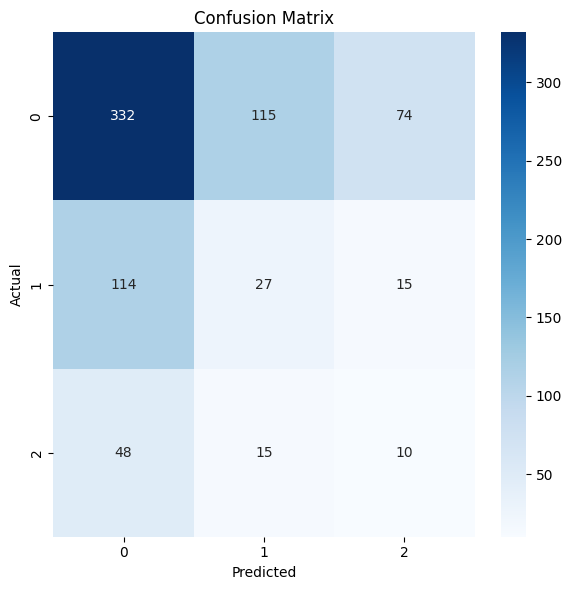

✅ ROC AUC Score: 0.4691


(0.492,
 0.5124633491190648,
 0.492,
 0.5016448496077183,
 np.float64(0.46910270493277006))

In [196]:
model_1, callbacks_1 = define_model(input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_encoded)),)
history_1 = model_1.fit(X_train_bal, y_train_encoded, validation_split=0.2, epochs=700, batch_size=42, verbose=1)
loss_curve_plot(history_1)
evaluate_model(model_1, X_test_pre, y_test_encoded)



### instance 2

Epoch 1/1000


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3925 - loss: 1.0809 - val_accuracy: 0.0000e+00 - val_loss: 1.5646
Epoch 2/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.4144 - loss: 1.0482 - val_accuracy: 0.0000e+00 - val_loss: 1.5916
Epoch 3/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.4295 - loss: 1.0359 - val_accuracy: 0.0000e+00 - val_loss: 1.5808
Epoch 4/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.4237 - loss: 1.0417 - val_accuracy: 0.0000e+00 - val_loss: 1.6075
Epoch 5/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.4223 - loss: 1.0379 - val_accuracy: 0.0000e+00 - val_loss: 1.6042
Epoch 6/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.4364 - loss: 1.0292 - val_accuracy: 0.0000e+00 - val_loss: 1.5863
Epoch 7/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.4392 - loss: 1.0206 - val_accuracy: 0.0000e+00 - val_loss: 1.5573
Epoch 8/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accur

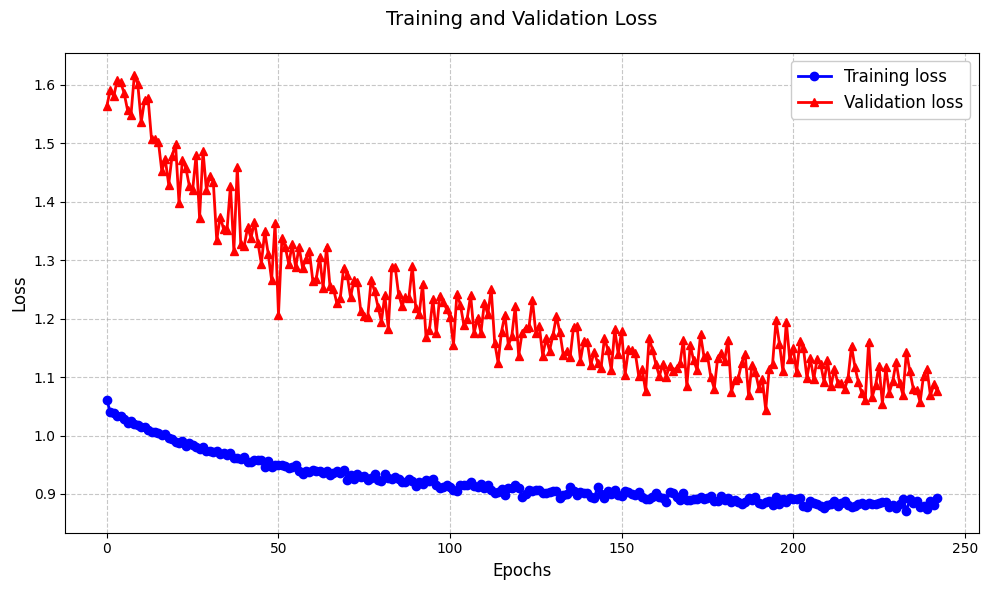


📊 Classification Report:

              precision    recall  f1-score   support

           0     0.6777    0.4319    0.5275       521
           1     0.1987    0.3974    0.2650       156
           2     0.1038    0.1507    0.1229        73

    accuracy                         0.3973       750
   macro avg     0.3267    0.3267    0.3051       750
weighted avg     0.5222    0.3973    0.4335       750

✅ Accuracy:  0.3973
✅ Precision: 0.5222
✅ Recall:    0.3973
✅ F1 Score:  0.4335


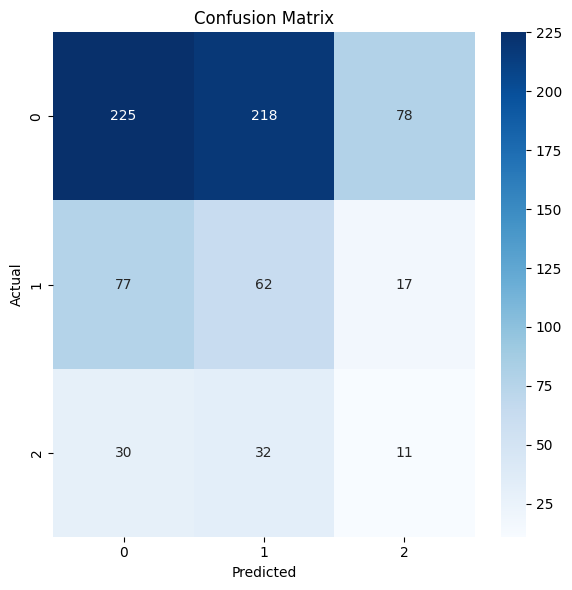

✅ ROC AUC Score: 0.4875


(0.3973333333333333,
 0.5222170947942715,
 0.3973333333333333,
 0.43354514500616,
 np.float64(0.48745834991684617))

In [197]:
model_2, callbacks_2 = define_model(
    optimizer_name='Adagrad',
    dropout_rate=0.3,
    learning_rate=0.0001,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:],
    num_classes=len(np.unique(y_train_encoded))
)

history_2 = model_2.fit(
    X_train_bal, y_train_encoded,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    callbacks=callbacks_2,
    verbose=1
)

loss_curve_plot(history_2)

evaluate_model(model_2, X_test_pre, y_test_encoded)


### instance 3

Epoch 1/1500


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4161 - loss: 1.1132 - val_accuracy: 0.0000e+00 - val_loss: 1.7058
Epoch 2/1500
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.4310 - loss: 1.0515 - val_accuracy: 0.0000e+00 - val_loss: 1.4382
Epoch 3/1500
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.4305 - loss: 1.0387 - val_accuracy: 0.0000e+00 - val_loss: 1.6259
Epoch 4/1500
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.4312 - loss: 1.0399 - val_accuracy: 0.0000e+00 - val_loss: 1.7725
Epoch 5/1500
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4326 - loss: 1.0353 - val_accuracy: 0.0000e+00 - val_loss: 1.6050
Epoch 6/1500
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4303 - loss: 1.0351 - val_accuracy: 0.0000e+00 - val_loss: 1.7687
Epoch 7/1500
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.4336 - loss: 1.0317 - val_accuracy: 0.0000e+00 - val_loss: 1.6220
Epoch 8/1500
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy:

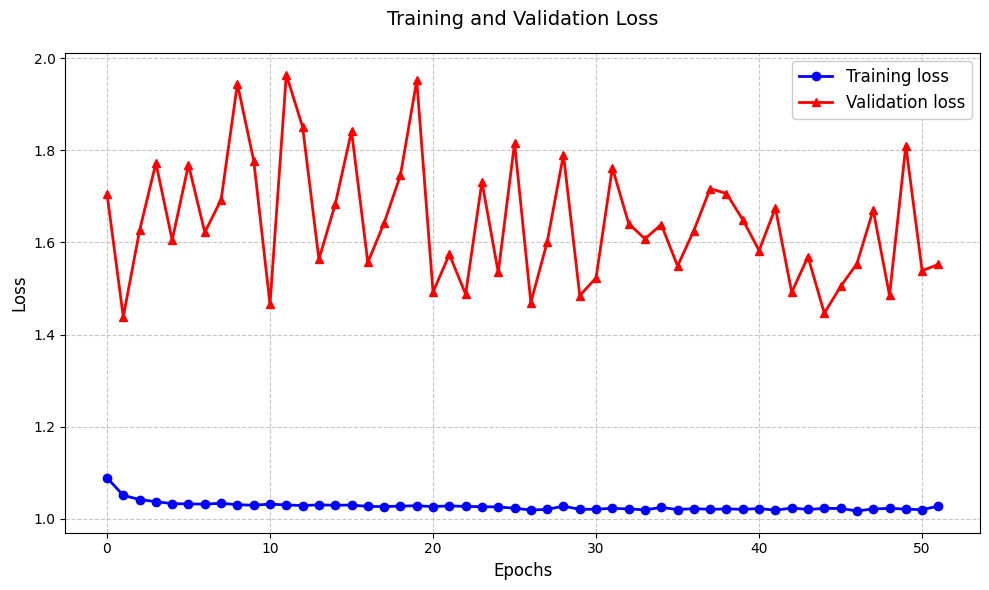


📊 Classification Report:

              precision    recall  f1-score   support

           0     0.7285    0.2111    0.3274       521
           1     0.2154    0.8269    0.3417       156
           2     0.0000    0.0000    0.0000        73

    accuracy                         0.3187       750
   macro avg     0.3146    0.3460    0.2230       750
weighted avg     0.5508    0.3187    0.2985       750

✅ Accuracy:  0.3187
✅ Precision: 0.5508
✅ Recall:    0.3187
✅ F1 Score:  0.2985


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWar

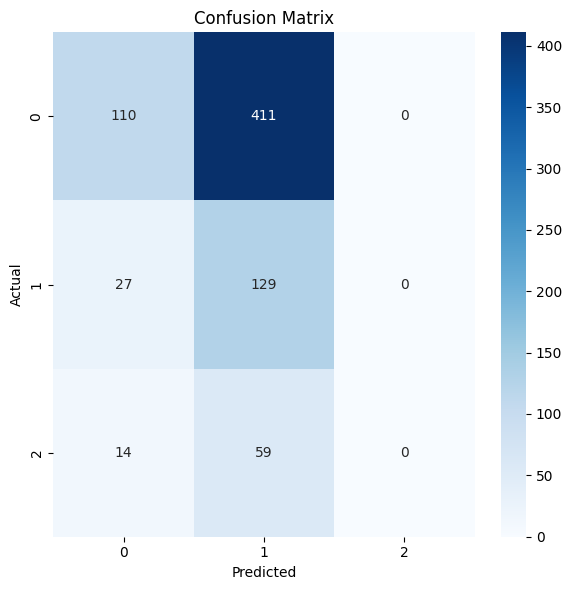

✅ ROC AUC Score: 0.5069


(0.31866666666666665,
 0.5508432228843511,
 0.31866666666666665,
 0.29849878061599916,
 np.float64(0.5068802077245361))

In [198]:
model_3, callbacks_3 = define_model(
    optimizer_name='RMSprop',
    regularizer_type='l2',
    dropout_rate=0.2,
    learning_rate=0.005,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_encoded))
)
history_3 = model_3.fit(X_train_bal, y_train_encoded, validation_split=0.2, epochs=1500, batch_size=32, callbacks=callbacks_3, verbose=1)
loss_curve_plot(history_3)
evaluate_model(model_3, X_test_pre, y_test_encoded)


### instance 4

Epoch 1/5000


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4240 - loss: 1.5123 - val_accuracy: 0.0000e+00 - val_loss: 1.8088
Epoch 2/5000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.4404 - loss: 1.4694 - val_accuracy: 0.0000e+00 - val_loss: 1.9298
Epoch 3/5000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.4408 - loss: 1.4460 - val_accuracy: 0.0000e+00 - val_loss: 1.9925
Epoch 4/5000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.4571 - loss: 1.4270 - val_accuracy: 0.0000e+00 - val_loss: 2.0223
Epoch 5/5000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.4575 - loss: 1.4012 - val_accuracy: 0.0000e+00 - val_loss: 2.0206
Epoch 6/5000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4714 - loss: 1.3824 - val_accuracy: 0.0000e+00 - val_loss: 2.0098
Epoch 7/5000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4602 - loss: 1.3791 - val_accuracy: 0.0000e+00 - val_loss: 2.0141
Epoch 8/5000
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

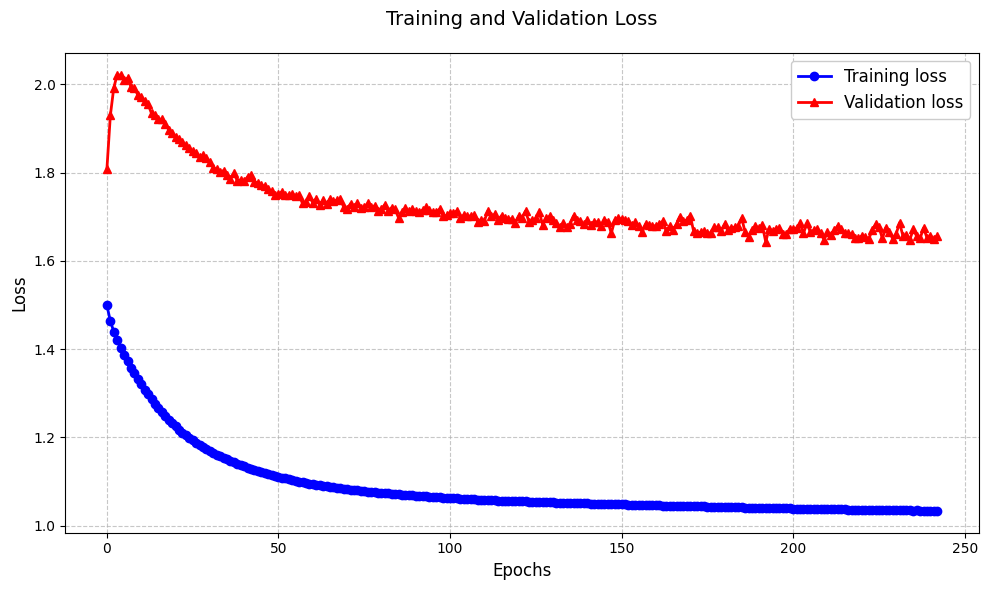


📊 Classification Report:

              precision    recall  f1-score   support

           0     0.7146    0.5816    0.6413       521
           1     0.2446    0.5064    0.3299       156
           2     0.0000    0.0000    0.0000        73

    accuracy                         0.5093       750
   macro avg     0.3197    0.3627    0.3237       750
weighted avg     0.5473    0.5093    0.5141       750

✅ Accuracy:  0.5093
✅ Precision: 0.5473
✅ Recall:    0.5093
✅ F1 Score:  0.5141


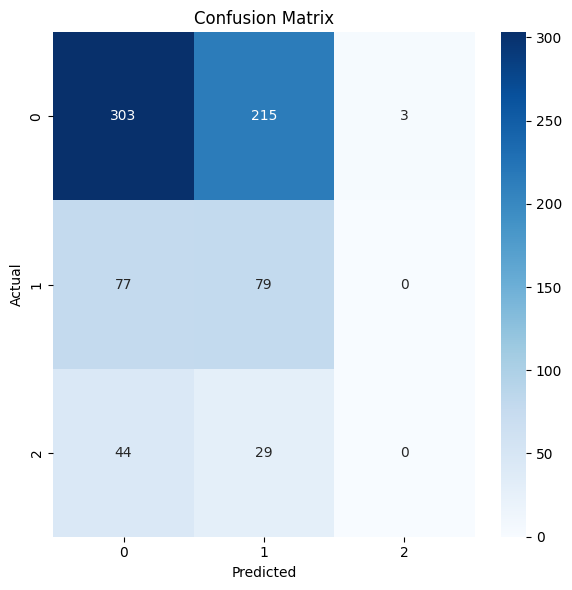

✅ ROC AUC Score: 0.5041


(0.5093333333333333,
 0.5472975933173667,
 0.5093333333333333,
 0.5140783864090753,
 np.float64(0.5041310838596904))

In [199]:
model_4, callbacks_4 = define_model(
    optimizer_name='Adam',
    regularizer_type='l1',
    learning_rate=0.0001,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_encoded))
)
history_4 = model_4.fit(X_train_bal, y_train_encoded, validation_split=0.2, epochs=5000, batch_size=42, callbacks=callbacks_4, verbose=1)
loss_curve_plot(history_4)
evaluate_model(model_4, X_test_pre, y_test_encoded)


### instance 5

Epoch 1/1000


/Users/davidniyonshuti/Desktop/ALU-COURSES/Introduction to machine learning/Intro2ML_Summative/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4094 - loss: 1.4672 - val_accuracy: 0.0000e+00 - val_loss: 2.0334
Epoch 2/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.4337 - loss: 1.2959 - val_accuracy: 0.0000e+00 - val_loss: 1.8506
Epoch 3/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.4438 - loss: 1.2056 - val_accuracy: 0.0000e+00 - val_loss: 1.7561
Epoch 4/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.4453 - loss: 1.1552 - val_accuracy: 0.0000e+00 - val_loss: 1.6707
Epoch 5/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.4553 - loss: 1.1163 - val_accuracy: 0.0000e+00 - val_loss: 1.6905
Epoch 6/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.4447 - loss: 1.1005 - val_accuracy: 0.0000e+00 - val_loss: 1.6606
Epoch 7/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.4390 - loss: 1.0830 - val_accuracy: 0.0000e+00 - val_loss: 1.6678
Epoch 8/1000
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accur

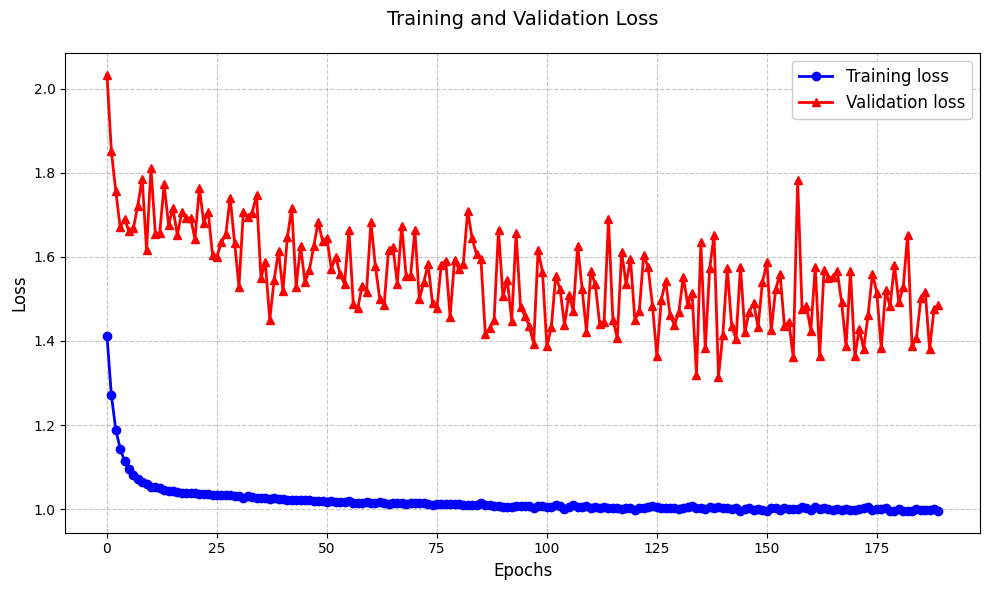


📊 Classification Report:

              precision    recall  f1-score   support

           0     0.7422    0.5470    0.6298       521
           1     0.2527    0.4487    0.3233       156
           2     0.1236    0.1507    0.1358        73

    accuracy                         0.4880       750
   macro avg     0.3728    0.3821    0.3630       750
weighted avg     0.5802    0.4880    0.5180       750

✅ Accuracy:  0.4880
✅ Precision: 0.5802
✅ Recall:    0.4880
✅ F1 Score:  0.5180


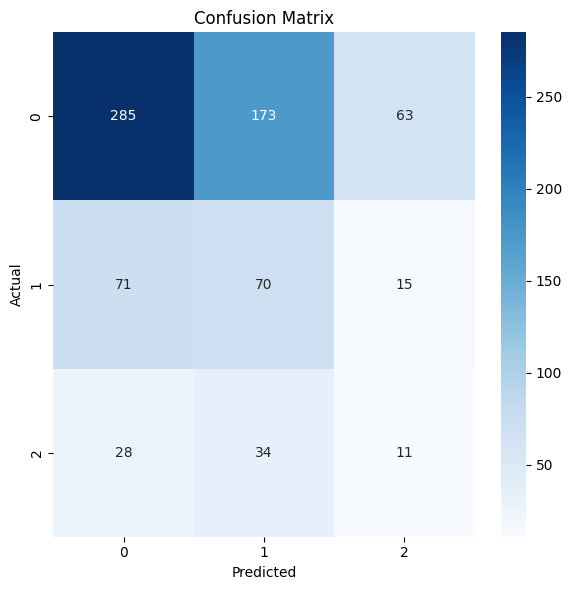

✅ ROC AUC Score: 0.5034


(0.488,
 0.58016605610879,
 0.488,
 0.5179947009759543,
 np.float64(0.5033981467844181))

In [200]:
model_5, callbacks_5 = define_model(
    optimizer_name='SDG',
    dropout_rate=0.03,
    regularizer_type='l1',
    learning_rate=0.006,
    early_stopping=True,
    input_shape=X_train_bal.shape[1:], num_classes=len(np.unique(y_train_encoded))
)
history_5 = model_5.fit(X_train_bal, y_train_encoded, validation_split=0.2, epochs=1000, batch_size=32, callbacks=callbacks_5, verbose=1)
loss_curve_plot(history_5)
evaluate_model(model_5, X_test_pre, y_test_encoded)


# Save the best model compare all model

In [201]:
# Evaluate all models and select the best one
results = {}
models = [model_1, model_2, model_3, model_4, model_5]

for i, model in enumerate(models, start=1):
    print(f"\n🔍 Evaluating model_{i}")
    
    try:
        # Ensure we're using the correct test data (X_test_pre instead of X)
        # and properly encoded labels (y_test_encoded instead of y)
        X_test_eval = np.asarray(X_test_pre, dtype='float32')
        y_test_eval = y_test_encoded  # Use the pre-encoded labels
        
        # Compute metrics
        acc, prec, rec, f1, roc_auc = evaluate_model(
            model, 
            X_test_eval, 
            y_test_eval, 
            show=False
        )
        
        # Store results only if evaluation succeeded
        if all(m is not None for m in [acc, prec, rec, f1]):
            results[f"model_{i}"] = {
                "model": model,
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1": f1,
                "roc_auc": roc_auc if roc_auc is not None else np.nan,
            }
        else:
            print(f"⚠️ Evaluation failed for model_{i} - skipping")
            results[f"model_{i}"] = {
                "model": model,
                "accuracy": np.nan,
                "precision": np.nan,
                "recall": np.nan,
                "f1": np.nan,
                "roc_auc": np.nan,
            }
            
    except Exception as e:
        print(f"🚨 Critical error evaluating model_{i}: {str(e)}")
        results[f"model_{i}"] = {
            "model": model,
            "accuracy": np.nan,
            "precision": np.nan,
            "recall": np.nan,
            "f1": np.nan,
            "roc_auc": np.nan,
        }

# Create DataFrame (excluding model objects) with proper NA handling
results_df = pd.DataFrame({
    name: {k: v for k, v in metrics.items() if k != 'model'}
    for name, metrics in results.items()
}).T

# Clean up metrics before sorting
results_df = results_df.apply(pd.to_numeric, errors='coerce')

# Display full metrics sorted by F1 (handling NA values)
print("\n📋 All Models Performance (sorted by F1):")
print(results_df.sort_values(
    by="f1", 
    ascending=False,
    na_position='last'
))

# Select best model (excluding failed evaluations)
valid_results = {
    k: v for k, v in results.items() 
    if not any(pd.isna(v[m]) for m in ['f1', 'accuracy'])
}

if valid_results:
    def model_score(metrics):
        return (
            metrics["f1"],
            metrics["roc_auc"] if not pd.isna(metrics["roc_auc"]) else 0,
            metrics["accuracy"]
        )

    best_model_name = max(valid_results, key=lambda k: model_score(valid_results[k]))
    best_model_metrics = valid_results[best_model_name]
    
    print(f"\n🏆 Best model: {best_model_name}")
    print("📌 Metrics:")
    print(f"  F1 Score:   {best_model_metrics['f1']:.4f}")
    if not pd.isna(best_model_metrics["roc_auc"]):
        print(f"  ROC AUC:    {best_model_metrics['roc_auc']:.4f}")
    print(f"  Accuracy:   {best_model_metrics['accuracy']:.4f}")
    print(f"  Precision:  {best_model_metrics['precision']:.4f}")
    print(f"  Recall:     {best_model_metrics['recall']:.4f}")
    
    # Save the best model to disk
    try:
        model_filename = f"Models/{best_model_name}.pkl"
        joblib.dump(best_model_metrics['model'], model_filename)
        print(f"\n💾 Best model saved to: Models/{model_filename}")
    except Exception as e:
        print(f"⚠️ Could not save model: {str(e)}")
else:
    print("\n🔴 No valid models to evaluate - all evaluations failed")


🔍 Evaluating model_1

🔍 Evaluating model_2

🔍 Evaluating model_3

🔍 Evaluating model_4

🔍 Evaluating model_5

📋 All Models Performance (sorted by F1):
         accuracy  precision    recall        f1   roc_auc
model_5  0.488000   0.580166  0.488000  0.517995  0.503398
model_4  0.509333   0.547298  0.509333  0.514078  0.504131
model_1  0.492000   0.512463  0.492000  0.501645  0.469103
model_2  0.397333   0.522217  0.397333  0.433545  0.487458
model_3  0.318667   0.550843  0.318667  0.298499  0.506880

🏆 Best model: model_5
📌 Metrics:
  F1 Score:   0.5180
  ROC AUC:    0.5034
  Accuracy:   0.4880
  Precision:  0.5802
  Recall:     0.4880

💾 Best model saved to: Models/Models/model_5.pkl


## Model Summarries

In [215]:
## Model Summarries
print('The following are the model summarries for the models used in this study:')
print("\n--- Model 1 Summary ---")
model_1.summary()
print("\n--- Model 2 Summary ---")
model_2.summary()
print("\n--- Model 3 Summary ---")
model_3.summary()
print("\n--- Model 4 Summary ---")
model_4.summary()    
print("\n--- Model 5 Summary ---")
model_5.summary()

The following are the model summarries for the models used in this study:

--- Model 1 Summary ---


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_116 (Dense)               │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,283 (40.17 KB)

 Trainable params: 3,427 (13.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,856 (26.79 KB)


--- Model 2 Summary ---


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,283 (40.17 KB)

 Trainable params: 3,427 (13.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,856 (26.79 KB)


--- Model 3 Summary ---


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_124 (Dense)               │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,856 (26.79 KB)

 Trainable params: 3,427 (13.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,429 (13.40 KB)


--- Model 4 Summary ---


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)               │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,283 (40.17 KB)

 Trainable params: 3,427 (13.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,856 (26.79 KB)


--- Model 5 Summary ---


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)               │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,283 (40.17 KB)

 Trainable params: 3,427 (13.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,856 (26.79 KB)

# Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [216]:



def make_predictions_from_csv(
    csv_path='handled_big_startup_secsees_dataset.csv', # Path to cleaned and handled dataset
    model_path=model_filename,
    preprocessor_path='preprocessor.joblib',
    label_encoder_path='label_encoder.joblib',
    row_index=0  
# Load the data
):
    try:
        # --- Load the data ---
        df = pd.read_csv(csv_path)
        
        # --- Feature engineering (same as training) ---
        df['founded_year'] = pd.to_datetime(df['founded_at'], errors='coerce').dt.year
        df['first_funding_year'] = pd.to_datetime(df['first_funding_at'], errors='coerce').dt.year
        df['simplified_category'] = df['category_list'].apply(simplify_category)

        # --- Select features ---
        features = ['funding_total_usd', 'funding_rounds', 'status', 'founded_year', 'first_funding_year', 'simplified_category']
        X = df[features]

        # --- Load preprocessor and transform ---
        preprocessor = load(preprocessor_path)
        X_pre = preprocessor.transform(X)

        # --- select a single row ---
        if row_index is not None:

            X_pre = X_pre[row_index].reshape(1, -1)

        # --- Load model and predict ---

        model = load(model_path)
        y_pred_raw = model.predict(X_pre)

        # Handle models that return one-hot or probability vectors
        if isinstance(y_pred_raw, np.ndarray) and y_pred_raw.ndim == 2 and y_pred_raw.shape[1] > 1:
            y_pred_index = np.argmax(y_pred_raw, axis=1)
        else:
            y_pred_index = y_pred_raw

        # --- Load label encoder and decode prediction ---
        label_encoder = load(label_encoder_path)
        y_pred_label = label_encoder.inverse_transform(y_pred_index)

        # --- Output ---
        if row_index is not None:
            print(f"✅ Prediction for row {row_index}: {y_pred_label[0]}")
            return y_pred_label[0]
        else:
            print(f"✅ Predictions for all rows: {list(y_pred_label[:5])} ...")
            return y_pred_label

    except Exception as e:
        print("❌ Error during prediction:", str(e))
        return None

    print(f"Dropped rows with missing 'name'. Remaining rows: {len(data)}")

# Print actual class for comparison
print("\n--- Actual Class of Each Row ---")
cols_to_show = [col for col in ['name', 'funding_class'] if col in data.columns]
if cols_to_show:
    print(data[cols_to_show])
else:
    print("Columns 'name' and/or 'funding_class' not found in data.")



--- Actual Class of Each Row ---
          funding_class
0              Rejected
1      Funding Eligible
2     Mentorship Needed
3      Funding Eligible
4      Funding Eligible
...                 ...
4995   Funding Eligible
4996   Funding Eligible
4997   Funding Eligible
4998   Funding Eligible
4999   Funding Eligible

[5000 rows x 1 columns]


In [ ]:
make_predictions_from_csv(row_index=2)
# Check if it matches the actual class
actual_class = data.loc[2, 'funding_class']
predicted_class = make_predictions_from_csv(row_index=2)
if predicted_class == actual_class:
    print(f"✅ Prediction matches actual class which is : {predicted_class}")
else:
    print(f"❌ Prediction does NOT match actual class: \nIt predicted {predicted_class} when it is supposed to predict {actual_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
✅ Prediction for row 2: Funding Eligible
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
✅ Prediction for row 2: Funding Eligible
❌ Prediction does NOT match actual class: 
It predicted Funding Eligible when it is supposed to predict Mentorship Needed


Congratulations!!
